In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import joblib
import sys

sys.path.append('../../src/')

warnings.filterwarnings("ignore")

In [19]:
!pip install imblearn

In [20]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE 

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [21]:
!pip install shap

In [22]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

In [23]:
df1 = pd.read_csv('D:\document\data_science\DLSL Study case\mini_project_DS\data\inter\dt_jams.csv')

In [24]:
df1.sample(5)

,time,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level,is_weekend,hours,jams_weekend,jams_weekday,jams_morning,jams_night,jams_midnight
308,2022-07-11 22:00:00,Ir Haji Juanda,2,688.0,70.0,16.840000,8,2.0,0,22,0.0,1.0,0.0,1.0,0.0
429,2022-07-13 21:00:00,Ir Haji Juanda,2,1233.5,95.5,17.050000,36,2.0,0,21,0.0,1.0,0.0,1.0,0.0
419,2022-07-13 18:00:00,Ir Haji Juanda,4,542.0,282.0,6.980000,10,4.0,0,18,0.0,1.0,0.0,1.0,0.0
2233,2022-08-11 21:00:00,Ir Haji Juanda,3,594.0,130.5,10.459999,46,3.0,0,21,0.0,1.0,0.0,1.0,0.0
377,2022-07-13 07:00:00,Ir Haji Juanda,1,1212.0,69.0,22.130000,2,1.0,0,7,0.0,1.0,1.0,0.0,0.0


In [25]:
df1['hours'] = df1['hours'].astype(np.object)
df1['level'] = df1['level'].astype(np.object)
df1 = df1.drop(['time'],axis=1)

In [26]:
# Grouping Features Based on Their Data Type

num = df1.select_dtypes(include=[np.number], exclude=[np.bool]).columns
cat = df1.select_dtypes(exclude=[np.number]).columns

In [27]:
num

Index(['median_length', 'median_delay', 'median_speed_kmh', 'total_records',
       'median_level', 'is_weekend', 'jams_weekend', 'jams_weekday',
       'jams_morning', 'jams_night', 'jams_midnight'],
      dtype='object')

In [28]:
cat

Index(['street', 'level', 'hours'], dtype='object')

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3779 entries, 0 to 3778
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   street            3779 non-null   object 
 1   level             3779 non-null   object 
 2   median_length     3779 non-null   float64
 3   median_delay      3779 non-null   float64
 4   median_speed_kmh  3779 non-null   float64
 5   total_records     3779 non-null   int64  
 6   median_level      3779 non-null   float64
 7   is_weekend        3779 non-null   int64  
 8   hours             3779 non-null   object 
 9   jams_weekend      3779 non-null   float64
 10  jams_weekday      3779 non-null   float64
 11  jams_morning      3779 non-null   float64
 12  jams_night        3779 non-null   float64
 13  jams_midnight     3779 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 413.5+ KB


In [30]:
df1_cat = pd.get_dummies(df1[cat].iloc[:,:])
df1_cat.head()

,street_Ir Haji Juanda,level_1,level_2,level_3,level_4,hours_0,hours_1,hours_2,hours_3,hours_4,hours_5,hours_6,hours_7,hours_8,hours_9,hours_10,hours_11,hours_12,hours_13,hours_14,hours_15,hours_16,hours_17,hours_18,hours_19,hours_20,hours_21,hours_22,hours_23
0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
df1_new = pd.concat([df1[num],df1_cat],axis=1)

In [32]:
df1_new.head()

,median_length,median_delay,median_speed_kmh,total_records,median_level,is_weekend,jams_weekend,jams_weekday,jams_morning,jams_night,jams_midnight,street_Ir Haji Juanda,level_1,level_2,level_3,level_4,hours_0,hours_1,hours_2,hours_3,hours_4,hours_5,hours_6,hours_7,hours_8,hours_9,hours_10,hours_11,hours_12,hours_13,hours_14,hours_15,hours_16,hours_17,hours_18,hours_19,hours_20,hours_21,hours_22,hours_23
0,1234.0,105.5,17.535,12,2.0,0,0.0,1.0,0.0,0.0,1.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,786.0,118.5,14.365,8,3.0,0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1114.0,79.0,18.990,3,3.0,0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,556.0,64.0,13.650,2,2.0,0,0.0,1.0,0.0,0.0,1.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1034.0,63.0,22.510,3,2.0,0,0.0,1.0,1.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Modeling

In [33]:
X = df1_new.drop('level_4', axis=1)
y = df1_new['level_4']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42,stratify=y)

In [35]:
X_train.shape, X_test.shape

((2519, 39), (1260, 39))

In [36]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [38]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [39]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 98.73015873015873 % and k = [3, 4, 5]


## Result Visualisation

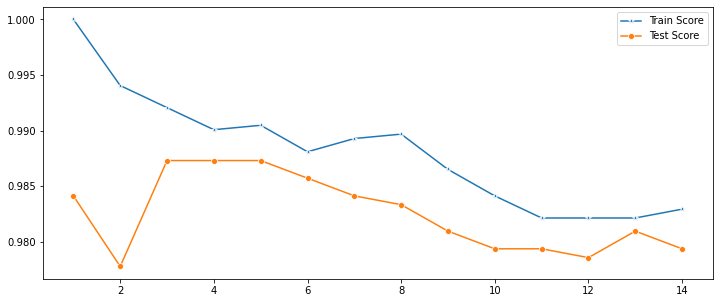

In [40]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [41]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(4)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9873015873015873

## Classification Report

In [47]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,982,7,989
1,9,262,271
All,991,269,1260


Text(0.5, 15.0, 'Predicted label')

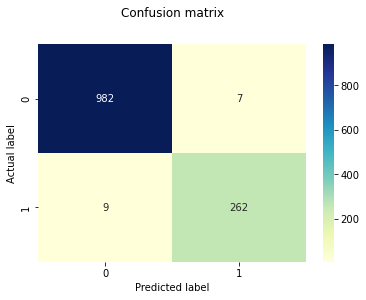

In [48]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       989
           1       0.97      0.97      0.97       271

    accuracy                           0.99      1260
   macro avg       0.98      0.98      0.98      1260
weighted avg       0.99      0.99      0.99      1260



##  Feature Importance

In [54]:
!pip install shap

In [55]:
import shap

In [69]:
# Fit the model
knn.fit(X_train, y_train)

# summarize the background data using shap.sample
background = shap.sample(X_train, 3)

# creating an explainer for our model
explainer = shap.KernelExplainer(knn.predict_proba, background) # we only need to pass our  fitted model to tree explainer. 
                                    #No background dataset in 'data' argument required for tree models as it
                                    #is automatically received through the model tree object.

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_train)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

  0%|          | 0/2519 [00:00<?, ?it/s]

Expected Value: [0.66666667 0.33333333]


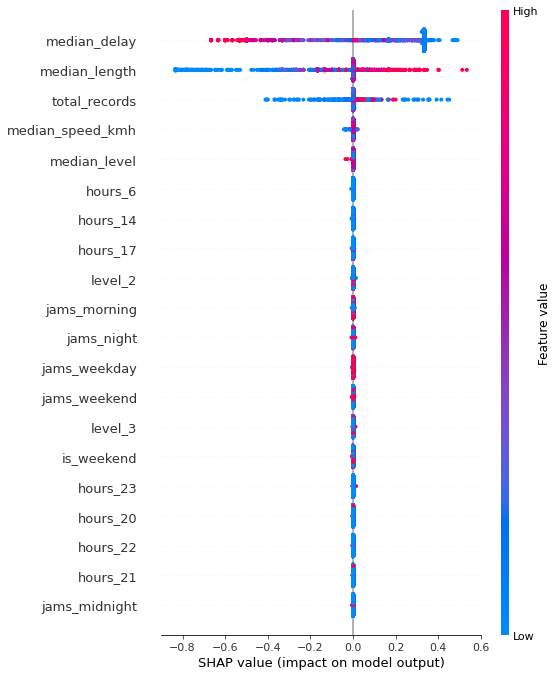

In [70]:
shap.initjs()
shap.summary_plot(shap_values[0], X_train)

## ROC - AUC

In [50]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

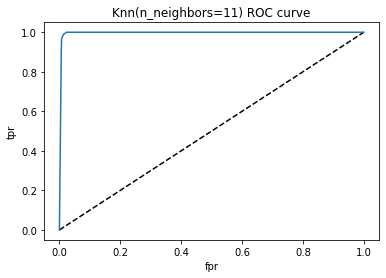

In [51]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [52]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9964069711475678

## Hyper Parameter optimization

In [53]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9849178317390237
Best Parameters: {'n_neighbors': 1}


## junk

In [37]:
# train,test = train_test_split(df1_new, test_size=0.3, stratify=df1_new['level_4'], random_state = 42)
# print("jumlah data training",train.shape[0], "atau", round(train.shape[0]/df1_new.shape[0]*100),'% dari total data')
# print("jumlah data test",test.shape[0], "atau", round(test.shape[0]/df1_new.shape[0]*100),'% dari total data')